<a href="https://colab.research.google.com/github/INA-95/retail_customer_behavior_analysis/blob/main/walmart_customer_behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Mount Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# library

import pandas as pd
import numpy as np
#import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
file_path = "/content/drive/MyDrive/Side_Project/side_project/Walmart/walmart_data.csv"
df = pd.read_csv(file_path)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
# Overall dataset analysis
# dataset format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
# meaning of every single row

# User_ID
# They have multiple purchase by User_ID
# That means User_ID is unique itself but some users made a purchase multiple time

df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [6]:
# Product_ID
# 상품 고유값
# 한 사람이 같은 상품을 산적이 없는가? 한 사람이 같은 상품을 여러 개 산 경우는 없음

for user_id, sub in df.groupby('User_ID'):
    temp = sub.groupby('Product_ID')['Product_ID'].count().rename_axis('product_id').reset_index()
    temp = temp.rename(columns = {'Product_ID' : 'num_of_purchase'})
    for val in temp['num_of_purchase']:
        if val > 1:
            print(temp['product_id'])
print('Every user never got same product')

Every user never got same product


In [ ]:
# 하나의 상품에 대해서는 여러 고객들이 주문했음을 알 수 있음

for product_id, sub in df.groupby('Product_ID'):
    print(product_id, ":", sub['User_ID'].count())

In [ ]:
# 하나의 로우가 의미하는 건 무엇인가? 유저가 구매한 상품에 대한 가격과 유저 인적정보

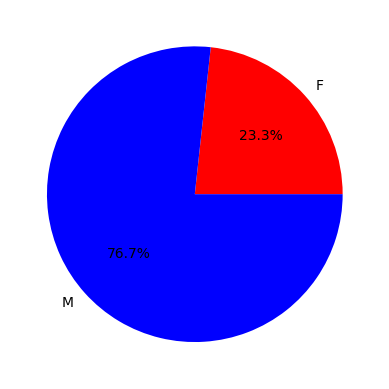

In [37]:
# 남자와 여자중 어떤 성별이 매출을 많이 내고 있나?
# 전체 매출에서 여자, 남자 각각이 차지하는 비율

gender_purchase = df.groupby('Gender')['Purchase'].sum().reset_index()
gender_purchase

genders = [gender for gender in gender_purchase['Gender']]
purchase_amt = [amt for amt in gender_purchase['Purchase']]
colors = ['red', 'blue']
plt.pie(purchase_amt, labels = genders, colors = colors, autopct='%1.1f%%')
plt.show()

In [39]:
# 남자들 연령대는 어떠한가?
# 남자 정보만 들어있는 데이터 프레임
m_df = df[df['Gender'] == 'M']

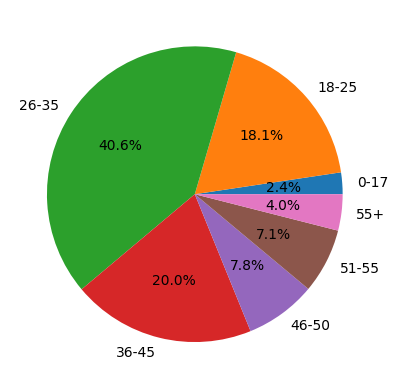

In [47]:
# 연령대별로 매출 분포

age_purchase = m_df.groupby('Age')['Purchase'].sum().reset_index()
ages = [age for age in age_purchase['Age']]
purchase_amt = [amt for amt in age_purchase['Purchase']]
plt.pie(purchase_amt, labels = ages, autopct='%1.1f%%')
plt.show()

In [ ]:
# 연령대별 인기 상품
# 26-35

purchase_26_35 = m_df[m_df['Age'] == '26-35'].groupby('Product_ID')['Purchase'].sum().reset_index()
purchase_26_35 = purchase_26_35.sort_values(by = 'Purchase', ascending = False)[:10]
print(purchase_26_35)

# 36-45

purchase_36_45 = m_df[m_df['Age'] == '36-45'].groupby('Product_ID')['Purchase'].sum().reset_index()
purchase_36_45 = purchase_36_45.sort_values(by = 'Purchase', ascending = False)[:10]
print(purchase_36_45)

In [120]:
# 남자 직업별 매출 분포도

occu_purchase = m_df.groupby('Occupation')['Purchase'].sum().reset_index()
occu_purchase

,Occupation,Purchase
0,0,475523125
1,1,271807418
2,2,165459113
3,3,90294529
4,4,513980163
5,5,94054709
6,6,114336992
7,7,466193977
8,8,11357904
9,9,4133559


In [138]:
occu_purchase['percentage'] = round((occu_purchase['Purchase'] / occu_purchase['Purchase'].sum()) * 100, 0)
occu_purchase

,Occupation,Purchase,percentage
0,0,475523125,12.0
1,1,271807418,7.0
2,2,165459113,4.0
3,3,90294529,2.0
4,4,513980163,13.0
5,5,94054709,2.0
6,6,114336992,3.0
7,7,466193977,12.0
8,8,11357904,0.0
9,9,4133559,0.0


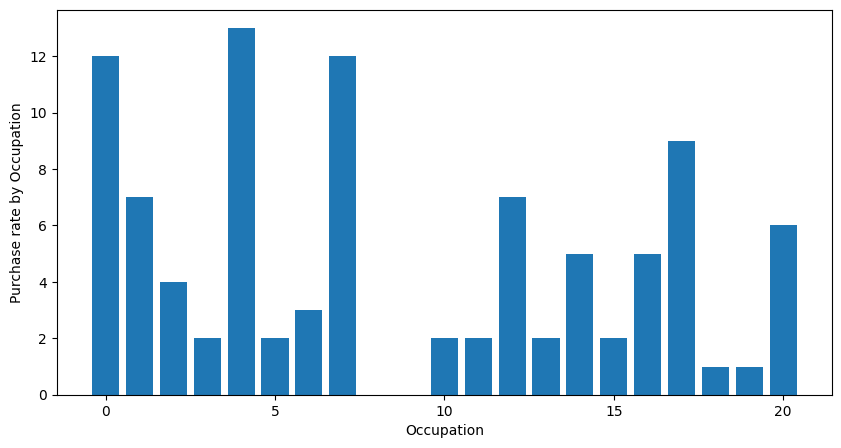

In [139]:
x = occu_purchase['Occupation'].tolist()
y = occu_purchase['percentage'].tolist()

fig = plt.figure(figsize = (10, 5))

plt.bar(x, y)
plt.xlabel("Occupation")
plt.ylabel("Purchase rate by Occupation")
plt.show()

[1010141746, 1621916597, 1277521757]


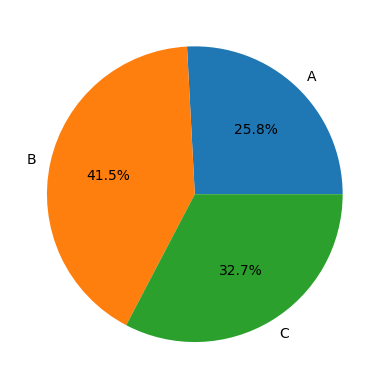

In [67]:
# 남자들이 사는곳

city_purchase = m_df.groupby('City_Category')['Purchase'].sum().reset_index()
citys = [city for city in city_purchase['City_Category']]
amt = [amt for amt in city_purchase['Purchase']]

print(amt)

plt.pie(amt, labels = citys, autopct='%1.1f%%')
plt.show()

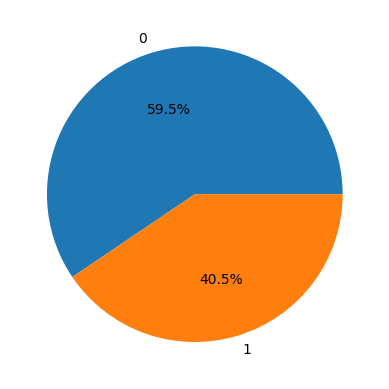

In [68]:
# 남자들 혼인여부

marital_purchase = m_df.groupby('Marital_Status')['Purchase'].sum().reset_index()
marital = [val for val in marital_purchase['Marital_Status']]
amt = [amt for amt in marital_purchase['Purchase']]

plt.pie(amt, labels = marital, autopct='%1.1f%%')
plt.show()